## SWE Analysis over Sierra Nevada Range using four models for a given season

SWE: Snow Water Equivalence

In [4]:
import xarray as xr
import numpy as np
import pandas as pd
from pandas import Series

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
from mpl_toolkits.axes_grid1.axes_divider import make_axes_area_auto_adjustable

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes

### Loading datasets

In [33]:
# SWE wrf datasets
ds_wrf_1980 = xr.open_dataset('./data/DOE_VIC.narr_wrf.monthly.swe.1980-2012.nc')
ds_wrf_2091 = xr.open_dataset('./data/DOE_VIC.narr_wrf.monthly.swe.2091-2100.nc')

# SWE loca_wrf
ds_loca_wrf_1980 = xr.open_dataset('./data/DOE_VIC.narr_LOCA_wrf.monthly.swe.1980-2012.nc')
ds_loca_wrf_2091 = xr.open_dataset('./data/DOE_VIC.narr_LOCA_wrf.monthly.swe.2091-2100.nc')

# SWE _loca_14
ds_loca_14_1980 = xr.open_dataset('./data/DOE_VIC.narr_LOCA_L14.monthly.swe.1980-2012.nc')
ds_loca_14_2091 = xr.open_dataset('./data/DOE_VIC.narr_LOCA_L14.monthly.swe.2091-2100.nc')

# SWE _bcsd_L14
ds_bcsd_L14_1980 = xr.open_dataset('./data/DOE_VIC.narr_BCSD_L14.monthly.swe.1980-2012.nc')
ds_bcsd_L14_2091 = xr.open_dataset('./data/DOE_VIC.narr_BCSD_L14.monthly.swe.2091-2100.nc')

In [34]:
# Export to pandas and check for not null values
#ds_wrf_1980['swe']
#test_df = ds_wrf_1980.to_dataframe()
#test_df[test_df['swe'].notnull()]
ds_wrf_1980

<xarray.Dataset>
Dimensions:         (latitude: 128, longitude: 112, nb2: 2, time: 396)
Coordinates:
  * longitude       (longitude) float32 -123.96875 -123.90625 -123.84375 ...
  * latitude        (latitude) float32 35.03125 35.09375 35.15625 35.21875 ...
  * time            (time) datetime64[ns] 1980-01-31 1980-02-29 1980-03-31 ...
Dimensions without coordinates: nb2
Data variables:
    longitude_bnds  (longitude, nb2) float32 ...
    latitude_bnds   (latitude, nb2) float32 ...
    swe             (time, latitude, longitude) float32 ...
Attributes:
    CDI:                Climate Data Interface version 1.6.1 (http://code.zma...
    Conventions:        GDT 1.2
    history:            Fri Jan 19 21:19:00 2018: cdo -O monavg /data5/emaure...
    institution:        DOE, Santa Clara University
    file_name:          DOE_VIC.narr_wrf.daily.swe.1980.nc
    History:            Archived 2017
    authors:            Maurer, E., SCU
    description:        Daily VIC Output
    creation_date: 

In [15]:
swe_wrf_from_1991 = ds_wrf_1980['swe'].sel(time=slice('1991-01-01', '2000-12-31'))
swe_loca_wrf_from_1991 = ds_loca_wrf_1980['swe'].sel(time=slice('1991-01-01','2000-12-31'))
swe_loca_14_from_1991 = ds_loca_14_1980['swe'].sel(time=slice('1991-01-01','2000-12-31'))
swe_bcsd_L14_from_1991 = ds_bcsd_L14_1980['swe'].sel(time=slice('1991-01-01', '2000-12-31'))

# Enter the season you want 
season_str = 'JJA'
# TODO: Add function to request month or season parameters
str_groupby = 'time.season'

### Mean difference of narr_wrf

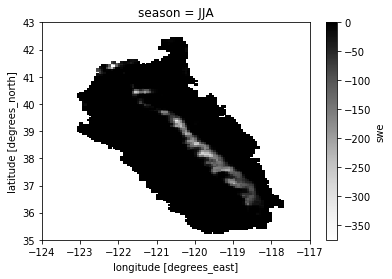

In [19]:

swe_wrf_1991 = swe_wrf_from_1991.groupby(str_groupby).mean('time')
swe_wrf_2091 = ds_wrf_2091['swe'].groupby(str_groupby).mean('time')
mean_diff_wrf_1991_2091 = (swe_wrf_2091.sel(season=season_str) - swe_wrf_1991.sel(season=season_str))  
mean_diff_wrf_1991_2091.plot(cmap='Greys')

### Mean difference of narr_loca_wrf

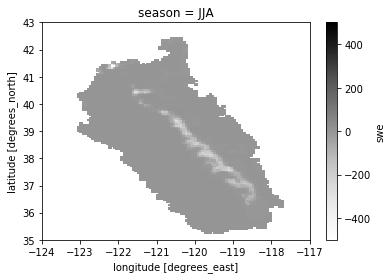

In [20]:
swe_loca_wrf_1991 = swe_loca_wrf_from_1991.groupby(str_groupby).mean('time')
swe_loca_wrf_2091 = ds_loca_wrf_2091['swe'].groupby(str_groupby).mean('time')
mean_diff_loca_wrf_1991_2091 = (swe_loca_wrf_2091.sel(season=season_str) - swe_loca_wrf_1991.sel(season=season_str))
mean_diff_loca_wrf_1991_2091.plot(cmap='Greys')

### Mean difference of narr_loca_14

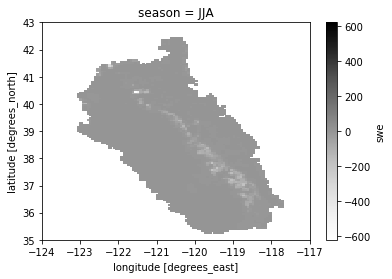

In [21]:
swe_loca_14_1991 = swe_loca_14_from_1991.groupby(str_groupby).mean('time')
swe_loca_14_2091 = ds_loca_14_2091['swe'].groupby(str_groupby).mean('time')
mean_diff_loca_14_1991_2091 = ((swe_loca_14_2091.sel(season=season_str) - swe_loca_14_1991.sel(season=season_str)))
mean_diff_loca_14_1991_2091.plot(cmap='Greys')

### Mean difference of narr_bcsd_L14

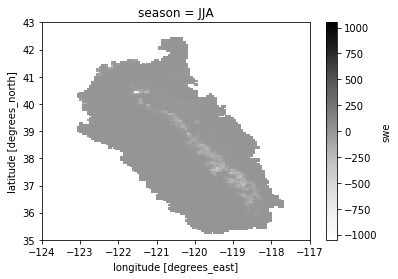

In [37]:
swe_bcsd_L14_1991 = swe_bcsd_L14_from_1991.groupby(str_groupby).mean('time')
swe_bcsd_L14_2091 = ds_bcsd_L14_2091['swe'].groupby(str_groupby).mean('time')
mean_diff_bcsd_L14_1991_2091 = (swe_loca_14_2091.sel(season=season_str) - swe_bcsd_L14_1991 .sel(season=season_str))
mean_diff_bcsd_L14_1991_2091.plot(cmap='Greys')

## Multi-plots

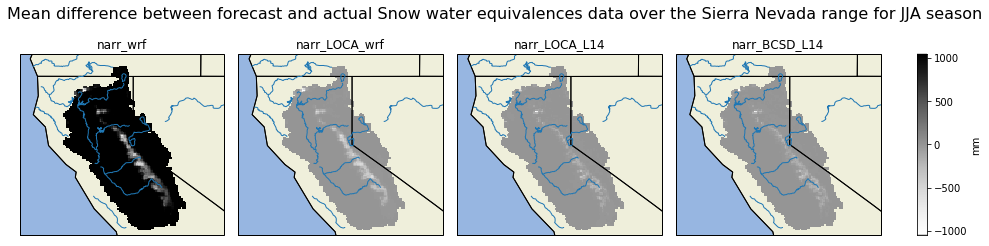

In [28]:
# figsize=(18, 8)
#fig, axes = plt.subplots(nrows=1, ncols=4 )



mean_list = [mean_diff_wrf_1991_2091, mean_diff_loca_wrf_1991_2091, mean_diff_loca_14_1991_2091, mean_diff_bcsd_L14_1991_2091]
projection = ccrs.PlateCarree()
axes_class = (GeoAxes, dict(map_projection=projection))
fig = plt.figure(figsize=(15, 15))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 4),
                axes_pad = 0.2,
                cbar_location="right",
                cbar_mode="single",
                cbar_pad=0.5,
                label_mode='',
                share_all=True
                
               )
cbar_label_title = 'mm'


for i, ax in enumerate(axgr):
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.STATES)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAKES)
    ax.set_extent([-125, -116, 43, 35])
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='none', edgecolor='tab:blue')
    ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='tab:blue')    
    test_plt = mean_list[i].plot.pcolormesh(ax=axgr[i], transform=ccrs.PlateCarree(), x='longitude', y='latitude', cmap='Greys', add_colorbar=False)
    
    

axgr[0].set_title('narr_wrf')
axgr[1].set_title('narr_LOCA_wrf')
axgr[2].set_title('narr_LOCA_L14')
axgr[3].set_title('narr_BCSD_L14')

#make_axes_area_auto_adjustable(axgr[0], pad=0.2, use_axes=[axgr[0], axgr[1], axgr[2], axgr[3]])
fig.subplots_adjust(left=0.06, top=1.64)
fig.suptitle('Mean difference between forecast and actual Snow water equivalences data over the Sierra Nevada range for JJA season', fontsize=16, y=1.01)
cb = axgr.cbar_axes[0].colorbar(test_plt)
cb.set_label_text(cbar_label_title)

